## $\epsilon(z)$ synthesis from $\Gamma(\omega, z)\Big|_{z=0}$

In [94]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import constants
from scipy import signal

The line is as follows

- L = 200 $\mu$
- $Z_L = 70 + j\omega 3\times10^9 \Omega$
- $R_g=50 \Omega$
- W = S = 20 $\mu$
- $L_{strip} = 3 \mu$
- $S_{strip} = 1\mu$
- $W_{strip} = 30\mu$

In [95]:
L = 200e-6
W = 20e-6
S = W
Lstrip = 3e-6
Sstrip = 1e-6
Wstrip = 30e-6

We have
$$\Gamma(\omega, z)=\frac{Z_L-Z(\omega, z)}{Z_L+Z(\omega,z)}$$
and we are given $\Gamma(\omega, 0)$
$$\Gamma(\omega, 0)=\frac{Z_L-Z(\omega, 0)}{Z_L+Z(\omega,0)}\implies Z(\omega, 0)=Z_L\frac{1-\Gamma(\omega, 0)}{1+\Gamma(\omega, 0)}$$

We also want that $Z(\omega, L) = Z_L$

Assume we are given that $\Gamma(\omega, z)\Big|_{z=0}$ is a low pass chebyshev's filter

In [96]:
%config InlineBackend.figure_format = 'svg'
plt.rcParams["figure.figsize"] = (6.4,4.8)

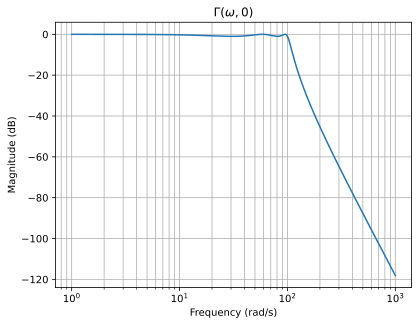

In [97]:
# Define filter parameters
order = 5
cutoff_freq = 1e2
ripple = 1  # in dB
# Create filter
b, a = signal.cheby1(order, ripple, cutoff_freq, 'low', analog=True)
Gamma0 = signal.TransferFunction(b, a)
# Plot frequency response
w, Gamma0 = signal.freqresp(Gamma0)
plt.semilogx(w, 20 * np.log10(abs(Gamma0)))
plt.title('$\Gamma(\omega, 0)$')
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Magnitude (dB)')
plt.grid(True, which="both")
plt.show()

Now that $\omega$ is defined, we can define $Z_L$

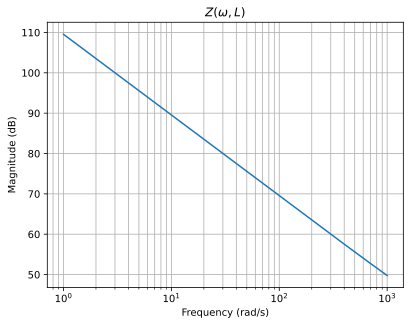

In [98]:
ZL = 70 + 3e5j/w
plt.semilogx(w, 20 * np.log10(abs(ZL)))
plt.title('$Z(\omega, L)$')
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Magnitude (dB)')
plt.grid(True, which="both")
plt.show()

Using $\Gamma(\omega, 0)$, we can find $Z(\omega, 0)$ given by `Z0`

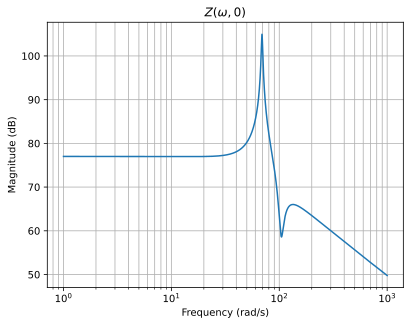

In [99]:
Z0 = ZL*((1-Gamma0)/(1+Gamma0))
plt.semilogx(w, 20 * np.log10(abs(Z0)))
plt.title('$Z(\omega, 0)$')
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Magnitude (dB)')
plt.grid(True, which="both")
plt.show()